In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display as lplt
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras

In [2]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [3]:
df.shape

(1000, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
df = df.drop(labels="filename", axis=1)

In [6]:
df.shape

(1000, 59)

In [7]:
audio_recording = "./genres_original/country/country.00050.wav"
data, sr = librosa.load(audio_recording, sr=45600)

In [8]:
data.size

1368608

In [9]:
Audio(data, rate=sr)

In [10]:
data

array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
       -0.11823352, -0.05911855], dtype=float32)

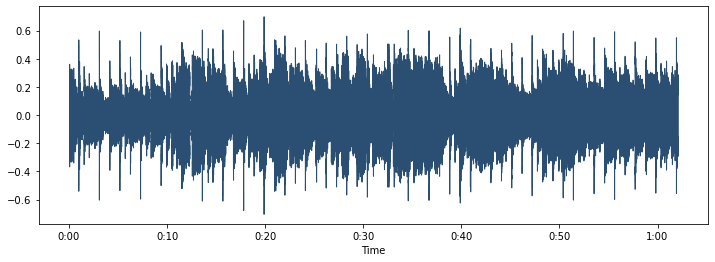

In [11]:
plt.figure(figsize=(12, 4))
lplt.waveshow(data, color="#2b4f72")

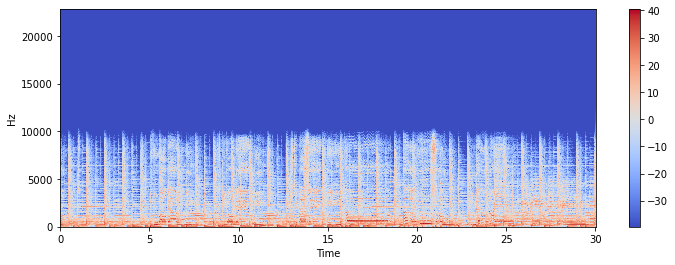

In [12]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12, 4))
lplt.specshow(stft_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

C:\Users\SAIGAN~1\AppData\Local\Temp/ipykernel_8140/3634418527.py:1: FutureWarning: Pass y=[ 0.05582627  0.07254332  0.06833789 ... -0.1285786  -0.10823352
 -0.04911855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


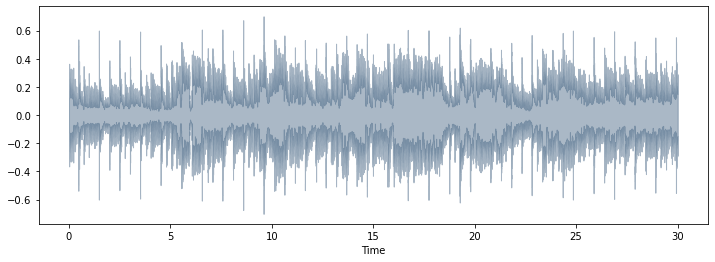

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
lplt.waveshow(data, sr=sr, alpha=0.4, color="#2b4f72")

C:\Users\SAIGAN~1\AppData\Local\Temp/ipykernel_8140/86902854.py:1: FutureWarning: Pass y=[ 0.04582627  0.06254332  0.0583379  ... -0.13857861 -0.11823352
 -0.05911855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


Text(0.5, 1.0, 'Chroma Features')

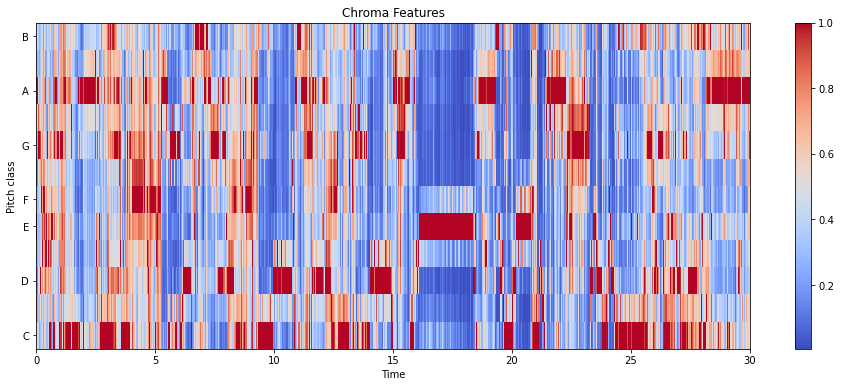

In [14]:
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16, 6))
lplt.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")

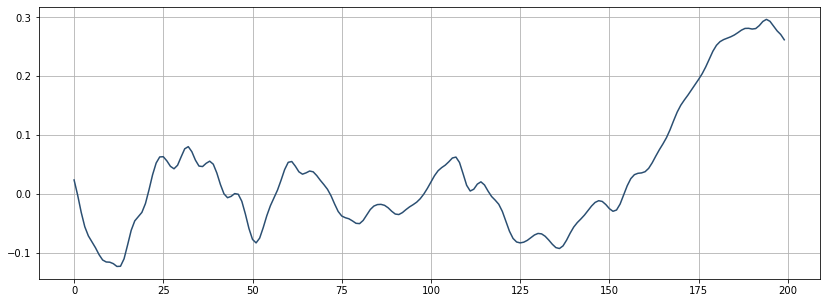

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(data[1000: 1200], color="#2b4f72")
plt.grid()

In [16]:
zero_cross_rate = librosa.zero_crossings(data[1000: 1200], pad=False)
sum(zero_cross_rate)

10

In [17]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(class_list)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [18]:
classes = dict(enumerate(convertor.classes_))
classes

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [19]:
df.iloc[:, :-1]

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0    661794          0.350088         0.088757  0.130228  0.002827   
1    661794          0.340914         0.094980  0.095948  0.002373   
2    661794          0.363637         0.085275  0.175570  0.002746   
3    661794          0.404785         0.093999  0.141093  0.006346   
4    661794          0.308526         0.087841  0.091529  0.002303   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525              2002.449060   
1               1530.176679          375850.073649              2039.036516   
2               1552.811865          156467.643368              1747.702312   
3               1070.106615          184355.942417              1596.412872   
4               1835.004266          343399.939274              1748.172116   
..                      ...                    ...                      ...   
995             2008.149458          282174.689224              2106.541053   
996             2006.843354          182114.709510              2068.942009   
997             2077.526598          231657.968040              1927.293153   
998             1398.699344          240318.731073              1818.450280   
999             1609.795082          422203.216152              1797.213044   

     spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0              85882.761315   3805.839606  ...     0.752740   52.420910   
1             213843.755497   3550.522098  ...     0.927998   55.356403   
2              76254.192257   3042.260232  ...     2.451690   40.598766   
3             166441.494769   2184.745799  ...     0.780874   44.427753   
4              88445.209036   3579.757627  ...    -4.520576   86.099236   
..                      ...           ...  ...          ...         ...   
995            88609.749506   4253.557033  ...     1.789867   45.050526   
996            82426.016726   4149.338328  ...     3.739020   33.851742   
997            74717.124394   4031.405321  ...     1.838090   33.597008   
998           109090.207161   3015.631004  ...    -2.812176   46.324894   
999           120115.632927   3246.908930  ...     1.794104   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  
0     55.062923     1.221291   46.936035  
1     51.106190     0.531217   45.786282  
2     46.639660    -2.231258   30.573025  
3     37.259739    -3.407448   31.949339  
4     62.910812   -11.703234   55.195160  
..          ...          ...         ...  
995   54.866825    -1.193787   49.950665  
996   39.196327    -2.795338   31.773624  
997   42.502201    -2.106337   29.865515  
998   47.227180    -3.590644   41.299088  


In [20]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
X.shape

(1000, 58)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [22]:
X_train.shape

(800, 58)

In [23]:
Y_train.shape

(800,)

In [24]:
X_test.shape

(200, 58)

In [25]:
Y_test.shape

(200,)

### Define Architecture

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1], )),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

### Compile and train

In [28]:
def train_model(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size)
    return history

def plot_validate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"])*100)
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [29]:
model_history = train_model(model, 600, "adam")

Epoch 1/600
7/7 [==============================] - 0s 32ms/step - loss: 2.2795 - accuracy: 0.1663 - val_loss: 2.2095 - val_accuracy: 0.3200
Epoch 2/600
7/7 [==============================] - 0s 8ms/step - loss: 2.2176 - accuracy: 0.2637 - val_loss: 2.1427 - val_accuracy: 0.3450
Epoch 3/600
7/7 [==============================] - 0s 7ms/step - loss: 2.1399 - accuracy: 0.3638 - val_loss: 2.0335 - val_accuracy: 0.4400
Epoch 4/600
7/7 [==============================] - 0s 6ms/step - loss: 2.0561 - accuracy: 0.4263 - val_loss: 1.9822 - val_accuracy: 0.4750
Epoch 5/600
7/7 [==============================] - 0s 7ms/step - loss: 2.0007 - accuracy: 0.4700 - val_loss: 1.9221 - val_accuracy: 0.5700
Epoch 6/600
7/7 [==============================] - 0s 9ms/step - loss: 1.9617 - accuracy: 0.5113 - val_loss: 1.8851 - val_accuracy: 0.5950
Epoch 7/600
7/7 [==============================] - 0s 10ms/step - loss: 1.9211 - accuracy: 0.5550 - val_loss: 1.8710 - val_accuracy: 0.6050
Epoch 8/600
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.4966 - accuracy: 0.9650 - val_loss: 1.6850 - val_accuracy: 0.7750
Epoch 118/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4973 - accuracy: 0.9650 - val_loss: 1.6796 - val_accuracy: 0.7900
Epoch 119/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4981 - accuracy: 0.9663 - val_loss: 1.6827 - val_accuracy: 0.7850
Epoch 120/600
7/7 [==============================] - 0s 10ms/step - loss: 1.4978 - accuracy: 0.9638 - val_loss: 1.6747 - val_accuracy: 0.7850
Epoch 121/600
7/7 [==============================] - 0s 7ms/step - loss: 1.5064 - accuracy: 0.9563 - val_loss: 1.6881 - val_accuracy: 0.7800
Epoch 122/600
7/7 [==============================] - 0s 10ms/step - loss: 1.5034 - accuracy: 0.9588 - val_loss: 1.6863 - val_accuracy: 0.7750
Epoch 123/600
7/7 [==============================] - 0s 7ms/step - loss: 1.5019 - accuracy: 0.9600 - val_loss: 1.6957 - val_accuracy: 0.7650
Epoch 124/600
7/7 [======

7/7 [==============================] - 0s 9ms/step - loss: 1.4852 - accuracy: 0.9762 - val_loss: 1.7090 - val_accuracy: 0.7550
Epoch 234/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4872 - accuracy: 0.9737 - val_loss: 1.7008 - val_accuracy: 0.7650
Epoch 235/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4839 - accuracy: 0.9787 - val_loss: 1.7065 - val_accuracy: 0.7500
Epoch 236/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4879 - accuracy: 0.9737 - val_loss: 1.7115 - val_accuracy: 0.7400
Epoch 237/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4843 - accuracy: 0.9775 - val_loss: 1.7131 - val_accuracy: 0.7500
Epoch 238/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4892 - accuracy: 0.9725 - val_loss: 1.7099 - val_accuracy: 0.7450
Epoch 239/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4854 - accuracy: 0.9762 - val_loss: 1.7091 - val_accuracy: 0.7500
Epoch 240/600
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.4900 - accuracy: 0.9712 - val_loss: 1.6997 - val_accuracy: 0.7550
Epoch 350/600
7/7 [==============================] - 0s 10ms/step - loss: 1.4834 - accuracy: 0.9787 - val_loss: 1.6959 - val_accuracy: 0.7650
Epoch 351/600
7/7 [==============================] - 0s 11ms/step - loss: 1.4816 - accuracy: 0.9800 - val_loss: 1.7084 - val_accuracy: 0.7450
Epoch 352/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4865 - accuracy: 0.9737 - val_loss: 1.6962 - val_accuracy: 0.7650
Epoch 353/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4921 - accuracy: 0.9700 - val_loss: 1.6978 - val_accuracy: 0.7600
Epoch 354/600
7/7 [==============================] - 0s 9ms/step - loss: 1.5009 - accuracy: 0.9613 - val_loss: 1.6981 - val_accuracy: 0.7600
Epoch 355/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4897 - accuracy: 0.9725 - val_loss: 1.6988 - val_accuracy: 0.7600
Epoch 356/600
7/7 [======

7/7 [==============================] - 0s 8ms/step - loss: 1.4765 - accuracy: 0.9850 - val_loss: 1.6937 - val_accuracy: 0.7700
Epoch 466/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4770 - accuracy: 0.9850 - val_loss: 1.6975 - val_accuracy: 0.7650
Epoch 467/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4774 - accuracy: 0.9837 - val_loss: 1.6976 - val_accuracy: 0.7650
Epoch 468/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4775 - accuracy: 0.9837 - val_loss: 1.6956 - val_accuracy: 0.7650
Epoch 469/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4778 - accuracy: 0.9825 - val_loss: 1.6948 - val_accuracy: 0.7650
Epoch 470/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4775 - accuracy: 0.9837 - val_loss: 1.6949 - val_accuracy: 0.7650
Epoch 471/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4775 - accuracy: 0.9837 - val_loss: 1.6946 - val_accuracy: 0.7650
Epoch 472/600
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.4774 - accuracy: 0.9850 - val_loss: 1.6858 - val_accuracy: 0.7750
Epoch 582/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4791 - accuracy: 0.9825 - val_loss: 1.6830 - val_accuracy: 0.7800
Epoch 583/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4763 - accuracy: 0.9837 - val_loss: 1.6852 - val_accuracy: 0.7800
Epoch 584/600
7/7 [==============================] - 0s 9ms/step - loss: 1.4801 - accuracy: 0.9812 - val_loss: 1.6961 - val_accuracy: 0.7700
Epoch 585/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4814 - accuracy: 0.9800 - val_loss: 1.6922 - val_accuracy: 0.7700
Epoch 586/600
7/7 [==============================] - 0s 8ms/step - loss: 1.4796 - accuracy: 0.9812 - val_loss: 1.7016 - val_accuracy: 0.7600
Epoch 587/600
7/7 [==============================] - 0s 7ms/step - loss: 1.4752 - accuracy: 0.9862 - val_loss: 1.6999 - val_accuracy: 0.7650
Epoch 588/600
7/7 [========

### Evaluate Model

In [30]:
model_history

Validation Accuracy 80.0000011920929


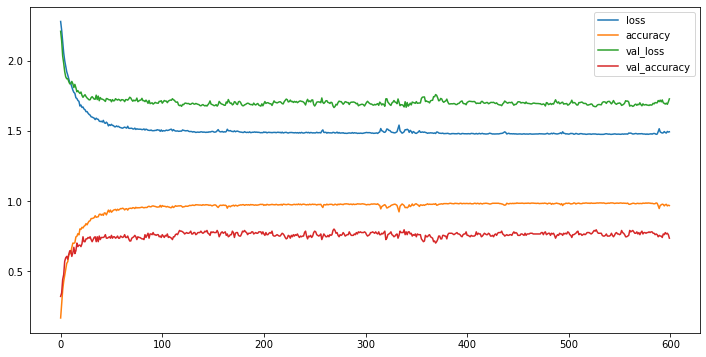

In [31]:
plot_validate(model_history)

In [32]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=128)
print(f'The test loss is: {test_loss}')
print(f'The Best accuracy is: {test_acc*100}')

2/2 [==============================] - 0s 1ms/step - loss: 1.7278 - accuracy: 0.7350
The test loss is: 1.7277637720108032
The Best accuracy is: 73.50000143051147


### Saving model

In [33]:
# print("Model started saving...")
# model.save("Music_Genre_Classifier_30", save_format='tf')
# print("Model saved successfully...")

### Classification Reports

In [34]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [35]:
pred = model.predict(X_test)

In [36]:
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6152237e-09, 6.3351871e-07, 5.2618843e-02, ..., 1.2091192e-09,
        6.2066867e-08, 9.4737816e-01],
       [1.5852292e-11, 6.4024719e-09, 1.0030994e-08, ..., 7.9412601e-08,
        2.9165295e-10, 9.9934334e-01],
       ...,
       [2.2303467e-25, 1.9978118e-27, 1.0000000e+00, ..., 4.3919932e-28,
        3.4839916e-26, 3.8584656e-22],
       [8.8434625e-01, 1.0878487e-09, 2.9407607e-10, ..., 5.9210724e-06,
        1.2491359e-06, 2.7622322e-09],
       [1.8251735e-06, 1.1631958e-07, 9.9993920e-01, ..., 2.8389971e-07,
        1.7410016e-06, 4.6137542e-05]], dtype=float32)

In [42]:
Y_test

array([7, 2, 3, 9, 9, 6, 2, 6, 0, 9, 3, 4, 2, 5, 7, 0, 4, 3, 3, 8, 8, 3,
       7, 4, 7, 6, 5, 5, 4, 4, 6, 2, 0, 8, 2, 9, 2, 7, 2, 8, 6, 4, 4, 0,
       2, 4, 3, 1, 8, 1, 0, 5, 9, 1, 5, 1, 3, 6, 4, 2, 6, 7, 1, 1, 9, 2,
       7, 6, 5, 2, 5, 3, 6, 2, 8, 8, 2, 3, 5, 7, 4, 6, 4, 7, 1, 6, 3, 5,
       3, 3, 4, 2, 8, 7, 0, 4, 9, 0, 0, 2, 2, 6, 8, 8, 4, 7, 5, 6, 5, 7,
       8, 6, 1, 2, 8, 0, 9, 0, 8, 5, 6, 5, 0, 5, 6, 3, 1, 8, 8, 3, 9, 4,
       1, 0, 0, 1, 8, 4, 6, 5, 5, 6, 7, 3, 6, 7, 1, 2, 7, 7, 7, 1, 5, 6,
       6, 0, 0, 3, 9, 3, 9, 8, 8, 8, 7, 7, 9, 0, 1, 8, 7, 6, 7, 0, 1, 0,
       4, 1, 7, 8, 0, 6, 4, 1, 0, 8, 9, 2, 1, 1, 5, 8, 4, 6, 5, 4, 1, 2,
       0, 2])

In [41]:
pred.shape

(200, 10)

In [47]:
pred[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 3.582189e-38, 1.000000e+00,
       0.000000e+00, 0.000000e+00], dtype=float32)

In [69]:
Y_pred = []

for i in range(len(pred)):
    Y_pred.append(np.argmax(pred[i]))
    
Y_pred = np.array(Y_pred)

In [70]:
Y_pred

array([7, 9, 9, 9, 9, 9, 2, 6, 0, 9, 3, 4, 2, 5, 7, 0, 4, 3, 3, 8, 2, 3,
       7, 8, 7, 6, 1, 5, 4, 7, 9, 2, 4, 2, 2, 9, 7, 7, 7, 5, 3, 8, 7, 5,
       2, 4, 2, 1, 8, 1, 0, 5, 8, 1, 5, 1, 3, 6, 0, 2, 6, 7, 2, 1, 9, 2,
       7, 3, 1, 2, 5, 1, 4, 2, 8, 1, 2, 4, 5, 7, 4, 6, 4, 7, 1, 9, 3, 5,
       6, 4, 4, 9, 0, 7, 0, 3, 9, 9, 2, 2, 2, 6, 9, 8, 4, 7, 5, 6, 5, 7,
       8, 6, 1, 2, 8, 0, 9, 0, 7, 5, 6, 5, 6, 5, 2, 3, 1, 8, 8, 3, 5, 4,
       1, 0, 2, 1, 8, 4, 6, 5, 7, 6, 7, 7, 6, 7, 1, 2, 7, 7, 7, 1, 5, 6,
       6, 0, 1, 3, 3, 3, 9, 3, 8, 9, 7, 7, 9, 0, 1, 8, 7, 6, 7, 0, 1, 0,
       8, 1, 7, 7, 0, 6, 4, 1, 0, 8, 3, 2, 1, 1, 5, 0, 4, 9, 5, 8, 1, 2,
       0, 2], dtype=int64)

In [75]:
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average="weighted")
print('Accuracy: ', "%.2f" % (acc*100))
print('F1: ', "%.2f" % (f1*100))

Accuracy:  73.50
F1:  73.13


In [76]:
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

In [77]:
print(cm)

[[14  1  2  0  1  1  1  0  0  1]
 [ 0 19  1  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  2  0  2]
 [ 0  1  1 10  2  0  1  1  0  1]
 [ 1  0  0  1 12  0  0  2  4  0]
 [ 0  2  0  0  0 16  0  1  0  0]
 [ 0  0  1  2  1  0 16  0  0  4]
 [ 0  0  0  0  0  0  0 22  0  0]
 [ 2  1  2  1  0  1  0  2 12  2]
 [ 0  0  0  2  0  1  0  0  1  9]]


In [78]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.79      0.95      0.86        20
           2       0.71      0.81      0.76        21
           3       0.62      0.59      0.61        17
           4       0.75      0.60      0.67        20
           5       0.84      0.84      0.84        19
           6       0.89      0.67      0.76        24
           7       0.73      1.00      0.85        22
           8       0.71      0.52      0.60        23
           9       0.47      0.69      0.56        13

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.75      0.73      0.73       200



In [84]:
labels = list(convertor.classes_)
labels

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [86]:
import seaborn as sns

Text(69.0, 0.5, 'Actual Values')

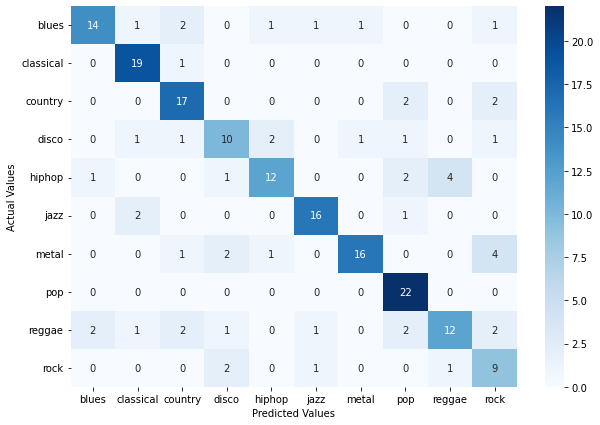

In [88]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')